# Posicionamento de N rainhas em um tabuleiro NxN

Desenvolva um programa em qualquer linguagem para posicionar N Rainhas em um tabuleiro NxN...

---

## **Solution Reference**

* Artificial Intelligence: A Modern Approach
* http://aima.cs.berkeley.edu/
* http://aima.cs.berkeley.edu/python/

**ref:**
- http://dvatvani.github.io/8-Queens.html
- https://github.com/dvatvani/dvatvani.github.io/blob/master/static/8-Queens/8_Queens_problem.ipynb

In [1]:
from __future__ import division
from itertools import permutations, combinations
import copy as cp
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
#Determine the size of the board
input_text = input() #raw_input('How big is your chess board?')
N = int(input_text)
x = range(1, N + 1)

master_list = []
for item in permutations(range(1, N + 1)):
    y = item
    new_list = []
    for x_value, y_value in zip(x, y):
        new_list.append((x_value, y_value))
    master_list.append(new_list)

def IsDiagonal(point1, point2):
    x1 = point1[0]
    y1 = point1[1]
    x2 = point2[0]
    y2 = point2[1]
    gradient = (y2 - y1) / (x2 - x1)
    if gradient == -1 or gradient == 1:
        return(True)
    else:
        return(False)

solutions = []
for possible_solution in master_list:
    diagonal_clash_list = []
    for piece1, piece2 in combinations(possible_solution, 2):
        diagonal_clash_list.append(IsDiagonal(piece1, piece2))

    if True not in diagonal_clash_list:
        solutions.append(possible_solution)

solutions = [set(solution) for solution in solutions]

print(f'Número de soluções encontradas: {len(solutions)}')

 8


Número de soluções encontradas: 92


In [4]:
# Remove symmetry elements

# Define C4 rotation
def c4(points):
    transformed_points = []
    for point in points:
        x, y = point
        transformed_points.append(((N + 1) - y, x))
    return(set(transformed_points))


# Define y=x mirror plane
def mirror(points):
    transformed_points = []
    for point in points:
        x, y = point
        transformed_points.append((y, x))
    return(set(transformed_points))


# Define solutions that are equivalent
def symmetry_equivalent_solutions(solution):
    equivalent_solutions = []
    equivalent_solutions.append(solution)
    equivalent_solutions.append(mirror(solution))
    equivalent_solutions.append(c4(solution))
    equivalent_solutions.append(mirror(c4(solution)))
    equivalent_solutions.append(c4(c4(solution)))
    equivalent_solutions.append(mirror(c4(c4(solution))))
    equivalent_solutions.append(c4(c4(c4(solution))))
    equivalent_solutions.append(mirror(c4(c4(c4(solution)))))
    return(equivalent_solutions)


#remove symmetry equivalent duplicates
unique_solutions = cp.deepcopy(solutions)
for n, solution in enumerate(solutions):
    found_in_solutions = False
    for related_solution in symmetry_equivalent_solutions(solution):
        if related_solution in solutions[n + 1:]:
            found_in_solutions = True
            break
    if found_in_solutions:
        unique_solutions.remove(solution)

len(unique_solutions)

12

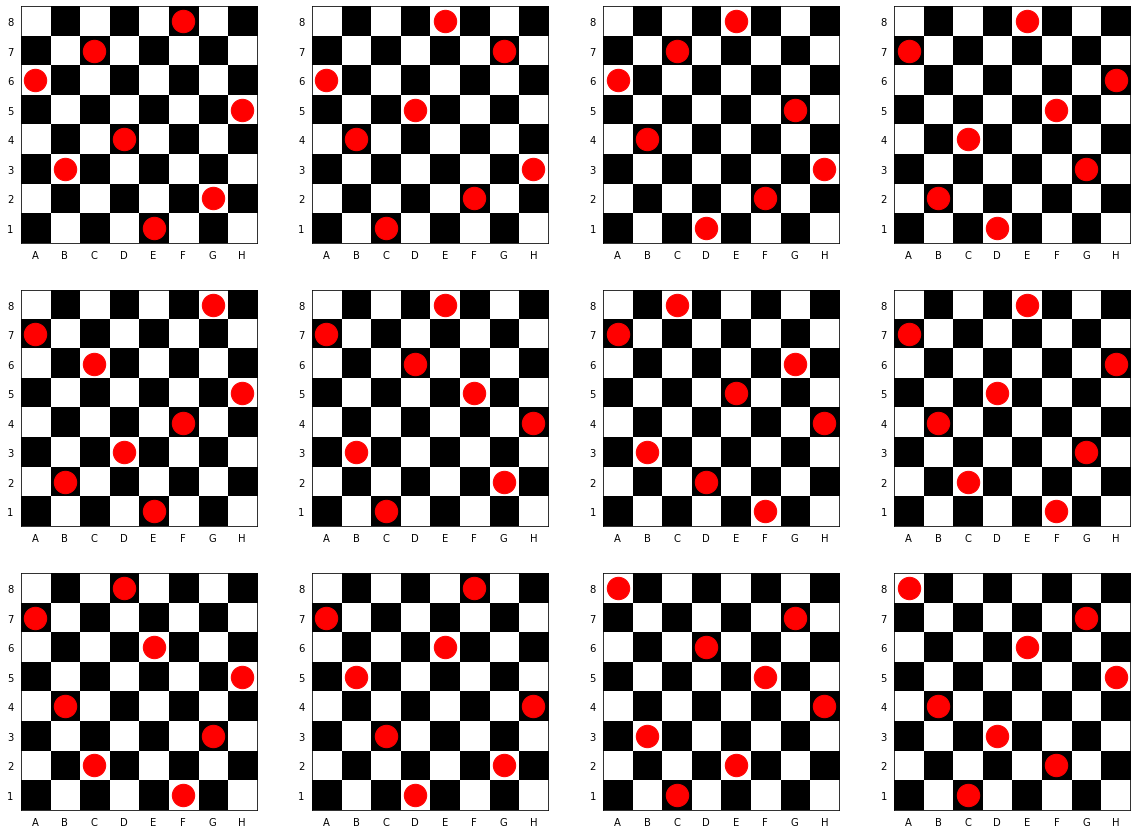

In [4]:
# Display solutions

def plot_solution(points, savefile_name=None):
    Z1 = np.zeros(N * N).reshape(N, N)
    for r, x in enumerate(Z1):
        for c, y in enumerate(x):
            if (r + c) % 2 == 0:
                Z1[r, c] = 1
    plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
               extent=(0.5, N + 0.5, 0.5, N + 0.5))

    row_labels = range(1, N + 1)
    col_labels = [letter for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"][:N]
    plt.xticks(range(1, N + 1), col_labels)
    plt.yticks(range(1, N + 1), row_labels)
    plt.xlim(0.5, N + 0.5)
    plt.ylim(0.5, N + 0.5)
    ax = plt.gca()
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    #plt.show()
    for point in points:
        plt.scatter(*point, color='r', s=500)
    if savefile_name:
        plt.savefig(savefile_name)
    #return(plt.gcf())

def plot_solutions(list_of_solutions):
    plt.gcf().set_size_inches(20,20)
    for n, solution in enumerate(list_of_solutions):
        plt.subplot(4,4,n+1)
        plot_solution(solution)

plot_solutions(unique_solutions)

In [27]:
from functools import reduce
from itertools import chain

import time

In [28]:
def puzzle_resolution(nRows, nCols):
    # starting time
    start = time.time()
    puzzle = queenPuzzle(nRows, nCols)
    # end time
    end = time.time()    
    return puzzle, end-start

def queenPuzzle(nRows, nCols):
    '''All board patterns of this dimension
       in which no two Queens share a row,
       column, or diagonal.
    '''
    def go(nRows):
        lessRows = nRows - 1
        return reduce(
            lambda a, xys: a + reduce(
                lambda b, iCol: b + [xys + [iCol]] if (
                    safe(lessRows, iCol, xys)
                ) else b,
                enumFromTo(1)(nCols),
                []
            ),
            go(lessRows),
            []
        ) if nRows > 0 else [[]]
    return go(nRows)

def safe(iRow, iCol, pattern):
    '''True if no two queens in the pattern
       share a row, column or diagonal.
    '''
    def p(sc, sr):
        return (iCol == sc) or (sc + sr == (iCol + iRow)) or (sc - sr == (iCol - iRow))

    return not any(map(p, pattern, range(0, iRow)))

In [29]:
# FORMATTING ----------------------------------------------

def showBoards(nCols):
    '''String representation, with N columns of a set of board patterns.'''
    def showBlock(b):
        return '\n'.join(map(intercalate('  '), zip(*b)))
 
    def go(bs):
        return '\n\n'.join(map(showBlock, chunksOf(nCols)(list(map(showBoard, bs)))))
    
    return lambda boards: go(boards)

def showBoard(xs):
    '''String representation of a Queens board.'''
    lng = len(xs)
 
    def showLine(n):
        return ('⬜' * (n - 1)) + '♛' + ('⬜' * (lng - n))

    return list(map(showLine, xs))

def fTable(s):
    '''Heading -> x display function -> fx display function ->
                     f -> xs -> tabular string.
    '''
    def go(xShow, fxShow, f, xs):
        ys = [xShow(x) for x in xs]
        w = max(map(len, ys))
        return s + '\n' + '\n'.join(map(lambda x, y: y.rjust(w, ' ') + ' -> ' + fxShow(f(x)), xs, ys))

    return lambda xShow: lambda fxShow: lambda f: lambda xs: go(xShow, fxShow, f, xs)

In [30]:
# GENERIC -------------------------------------------------

def enumFromTo(m):
    '''Integer enumeration from m to n.'''
    return lambda n: list(range(m, 1 + n))

def chunksOf(n):
    '''A series of lists of length n, subdividing the
       contents of xs. Where the length of xs is not evenly
       divible, the final list will be shorter than n.
    '''
    return lambda xs: reduce(
        lambda a, i: a + [xs[i:n + i]],
        range(0, len(xs), n), []) if 0 < n else []

def intercalate(x):
    '''The concatenation of xs
       interspersed with copies of x.
    '''
    return lambda xs: x.join(xs) if isinstance(x, str) else list(
        chain.from_iterable(
            reduce(lambda a, v: a + [x, v], xs[1:], [xs[0]])
        )) if xs else []

In [34]:
n = 9
xs, elapsed_time = puzzle_resolution(n, n)

In [35]:
elapsed_time

0.11092257499694824

In [36]:
%%time

n = 9
xs = queenPuzzle(n, n)

CPU times: user 122 ms, sys: 3.4 ms, total: 125 ms
Wall time: 124 ms


In [37]:
print(str(len(xs)) + ' solutions for a {n} * {n} board:\n'.format(n=n))
print(showBoards(10)(xs))

352 solutions for a 9 * 9 board:

♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜  ♛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜
⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜♛⬜⬜⬜
⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜⬜⬜⬜⬜⬜⬜♛
⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜♛⬜
⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜⬜⬜⬜⬜⬜⬜♛  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜♛⬜⬜⬜⬜⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜
⬜⬜⬜⬜♛⬜⬜⬜⬜  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜⬜♛⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜⬜⬜♛⬜⬜  ⬜⬜⬜⬜⬜♛⬜⬜⬜  ⬜⬜♛⬜⬜⬜⬜⬜⬜  ⬜⬜⬜⬜⬜♛

In [11]:
%%time

print(fTable(
    '\n' + 'Verificação de possibilidades'+ ':\n')(str)(
    lambda n: str(n).rjust(3, ' '))(
    lambda n: len(queenPuzzle(n, n)))(enumFromTo(1)(11)))


Verificação de possibilidades:

 1 ->   1
 2 ->   0
 3 ->   0
 4 ->   2
 5 ->  10
 6 ->   4
 7 ->  40
 8 ->  92
 9 -> 352
10 -> 724
11 -> 2680
CPU times: user 18.3 s, sys: 192 ms, total: 18.5 s
Wall time: 18.8 s
